In [54]:
import pandas as pd
import numpy as np
from datetime import datetime
from math import sqrt, cos

In [55]:
from module.distance_calculator import DistanceCalculator

In [56]:
df = pd.read_excel('sample_rbh_data.xlsx', sheet_name='Sheet1')

In [57]:
df.head()

,jobId,jobAcceptedTime,calledMerchantTime,arrivedAtMerchantTime,mealPickedUpTime,arrivedAtCustLocationTime,foodDeliveredTime,riderInitialLatLong.lat,riderInitialLatLong.lng,Merchant.Lat,Merchant.Lng,Customer.lat,Customer.lng
0,S210712297069,2021-07-12T11:51:59Z,2021-07-12T11:53:32Z,2021-07-12T11:55:42Z,2021-07-12T12:18:58Z,2021-07-12T12:23:48Z,2021-07-12T12:24:10Z,13.696167,100.372988,13.692471,100.378297,13.687792,100.3599
1,S210712176524,2021-07-12T04:54:43Z,2021-07-12T04:55:11Z,2021-07-12T05:08:57Z,2021-07-12T05:09:21Z,2021-07-12T05:26:02Z,2021-07-12T05:26:24Z,13.855861,100.505192,13.866007,100.497420,13.869973,100.455743
2,S210712207553,2021-07-12T06:19:40Z,2021-07-12T06:22:43Z,2021-07-12T06:39:45Z,2021-07-12T06:40:19Z,2021-07-12T06:55:35Z,2021-07-12T06:56:06Z,13.923222,100.641427,13.937330,100.625068,13.954999,100.611758
3,S210712202283,2021-07-12T06:03:43Z,2021-07-12T06:04:48Z,2021-07-12T06:12:18Z,2021-07-12T06:12:59Z,2021-07-12T06:26:30Z,2021-07-12T06:26:48Z,13.749551,100.650041,13.743053,100.624662,13.738476,100.692156
4,S210712235129,2021-07-12T08:12:10Z,2021-07-12T08:12:45Z,2021-07-12T08:17:26Z,2021-07-12T08:27:44Z,2021-07-12T08:50:51Z,2021-07-12T08:50:58Z,13.787922,100.780864,13.802771,100.782363,13.769007,100.722973


In [58]:
df.shape

(296, 13)

In [59]:
df["jobAcceptedTime"] = pd.to_datetime(df["jobAcceptedTime"], format="%Y-%m-%d %H:%M:%S")
df["calledMerchantTime"] = pd.to_datetime(df["calledMerchantTime"], format="%Y-%m-%d %H:%M:%S")
df["arrivedAtMerchantTime"] = pd.to_datetime(df["arrivedAtMerchantTime"], format="%Y-%m-%d %H:%M:%S")
df["mealPickedUpTime"] = pd.to_datetime(df["mealPickedUpTime"], format="%Y-%m-%d %H:%M:%S")
df["arrivedAtCustLocationTime"] = pd.to_datetime(df["arrivedAtCustLocationTime"], format="%Y-%m-%d %H:%M:%S")
df["foodDeliveredTime"] = pd.to_datetime(df["foodDeliveredTime"], format="%Y-%m-%d %H:%M:%S")

In [60]:
str_lat = [lat for lat in df["Customer.lat"].unique() if type(lat) == str]
str_lng = [lng for lng in df["Customer.lng"].unique() if type(lng) == str]
str_lat[:5]

[' ตำบลคูคต อำเภอลำลูกกา ปทุมธานี 12130 ประเทศไทย',
 ' Phasi Charoen',
 ' Min Buri',
 ' Thung Maha Mek',
 ' Pak Nam']

In [61]:
df = df.drop(df[df["Customer.lat"].isin(str_lat)].index)
df = df.drop(df[df["Customer.lng"].isin(str_lng)].index)

In [62]:
df["duration"] = (df["foodDeliveredTime"] - df["mealPickedUpTime"]).dt.total_seconds()//60

In [63]:
df.head()

,jobId,jobAcceptedTime,calledMerchantTime,arrivedAtMerchantTime,mealPickedUpTime,arrivedAtCustLocationTime,foodDeliveredTime,riderInitialLatLong.lat,riderInitialLatLong.lng,Merchant.Lat,Merchant.Lng,Customer.lat,Customer.lng,duration
0,S210712297069,2021-07-12 11:51:59+00:00,2021-07-12 11:53:32+00:00,2021-07-12 11:55:42+00:00,2021-07-12 12:18:58+00:00,2021-07-12 12:23:48+00:00,2021-07-12 12:24:10+00:00,13.696167,100.372988,13.692471,100.378297,13.687792,100.3599,5.0
1,S210712176524,2021-07-12 04:54:43+00:00,2021-07-12 04:55:11+00:00,2021-07-12 05:08:57+00:00,2021-07-12 05:09:21+00:00,2021-07-12 05:26:02+00:00,2021-07-12 05:26:24+00:00,13.855861,100.505192,13.866007,100.497420,13.869973,100.455743,17.0
2,S210712207553,2021-07-12 06:19:40+00:00,2021-07-12 06:22:43+00:00,2021-07-12 06:39:45+00:00,2021-07-12 06:40:19+00:00,2021-07-12 06:55:35+00:00,2021-07-12 06:56:06+00:00,13.923222,100.641427,13.937330,100.625068,13.954999,100.611758,15.0
3,S210712202283,2021-07-12 06:03:43+00:00,2021-07-12 06:04:48+00:00,2021-07-12 06:12:18+00:00,2021-07-12 06:12:59+00:00,2021-07-12 06:26:30+00:00,2021-07-12 06:26:48+00:00,13.749551,100.650041,13.743053,100.624662,13.738476,100.692156,13.0
4,S210712235129,2021-07-12 08:12:10+00:00,2021-07-12 08:12:45+00:00,2021-07-12 08:17:26+00:00,2021-07-12 08:27:44+00:00,2021-07-12 08:50:51+00:00,2021-07-12 08:50:58+00:00,13.787922,100.780864,13.802771,100.782363,13.769007,100.722973,23.0


In [64]:
df["duration"].mean()

12.354243542435425

In [65]:
def extract_datetime(df, datetime_col):
    df[datetime_col + ".dayOfWeek"] = df[datetime_col].dt.dayofweek
    # df[datetime_col + ".year"] = df[datetime_col].dt.year
    # df[datetime_col + ".month"] = df[datetime_col].dt.month
    # df[datetime_col + ".day"] = df[datetime_col].dt.day
    # df[datetime_col + ".hour"] = df[datetime_col].dt.hour
    # df[datetime_col + ".minute"] = df[datetime_col].dt.minute
    # df[datetime_col + ".second"] = df[datetime_col].dt.second
    df.drop(columns=[datetime_col], inplace=True)
    return df

In [66]:
# df = extract_datetime(df, "jobAcceptedTime")
# df = extract_datetime(df, "calledMerchantTime")
# df = extract_datetime(df, "arrivedAtMerchantTime")
# df = extract_datetime(df, "mealPickedUpTime")
# df = extract_datetime(df, "arrivedAtCustLocationTime")
# df = extract_datetime(df, "foodDeliveredTime")

In [67]:
df.head()

,jobId,jobAcceptedTime,calledMerchantTime,arrivedAtMerchantTime,mealPickedUpTime,arrivedAtCustLocationTime,foodDeliveredTime,riderInitialLatLong.lat,riderInitialLatLong.lng,Merchant.Lat,Merchant.Lng,Customer.lat,Customer.lng,duration
0,S210712297069,2021-07-12 11:51:59+00:00,2021-07-12 11:53:32+00:00,2021-07-12 11:55:42+00:00,2021-07-12 12:18:58+00:00,2021-07-12 12:23:48+00:00,2021-07-12 12:24:10+00:00,13.696167,100.372988,13.692471,100.378297,13.687792,100.3599,5.0
1,S210712176524,2021-07-12 04:54:43+00:00,2021-07-12 04:55:11+00:00,2021-07-12 05:08:57+00:00,2021-07-12 05:09:21+00:00,2021-07-12 05:26:02+00:00,2021-07-12 05:26:24+00:00,13.855861,100.505192,13.866007,100.497420,13.869973,100.455743,17.0
2,S210712207553,2021-07-12 06:19:40+00:00,2021-07-12 06:22:43+00:00,2021-07-12 06:39:45+00:00,2021-07-12 06:40:19+00:00,2021-07-12 06:55:35+00:00,2021-07-12 06:56:06+00:00,13.923222,100.641427,13.937330,100.625068,13.954999,100.611758,15.0
3,S210712202283,2021-07-12 06:03:43+00:00,2021-07-12 06:04:48+00:00,2021-07-12 06:12:18+00:00,2021-07-12 06:12:59+00:00,2021-07-12 06:26:30+00:00,2021-07-12 06:26:48+00:00,13.749551,100.650041,13.743053,100.624662,13.738476,100.692156,13.0
4,S210712235129,2021-07-12 08:12:10+00:00,2021-07-12 08:12:45+00:00,2021-07-12 08:17:26+00:00,2021-07-12 08:27:44+00:00,2021-07-12 08:50:51+00:00,2021-07-12 08:50:58+00:00,13.787922,100.780864,13.802771,100.782363,13.769007,100.722973,23.0


In [68]:
df.shape

(271, 14)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 0 to 295
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   jobId                      271 non-null    object             
 1   jobAcceptedTime            271 non-null    datetime64[ns, UTC]
 2   calledMerchantTime         271 non-null    datetime64[ns, UTC]
 3   arrivedAtMerchantTime      271 non-null    datetime64[ns, UTC]
 4   mealPickedUpTime           271 non-null    datetime64[ns, UTC]
 5   arrivedAtCustLocationTime  271 non-null    datetime64[ns, UTC]
 6   foodDeliveredTime          271 non-null    datetime64[ns, UTC]
 7   riderInitialLatLong.lat    271 non-null    float64            
 8   riderInitialLatLong.lng    271 non-null    float64            
 9   Merchant.Lat               271 non-null    float64            
 10  Merchant.Lng               271 non-null    float64            
 11  Custom

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 0 to 295
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   jobId                      271 non-null    object             
 1   jobAcceptedTime            271 non-null    datetime64[ns, UTC]
 2   calledMerchantTime         271 non-null    datetime64[ns, UTC]
 3   arrivedAtMerchantTime      271 non-null    datetime64[ns, UTC]
 4   mealPickedUpTime           271 non-null    datetime64[ns, UTC]
 5   arrivedAtCustLocationTime  271 non-null    datetime64[ns, UTC]
 6   foodDeliveredTime          271 non-null    datetime64[ns, UTC]
 7   riderInitialLatLong.lat    271 non-null    float64            
 8   riderInitialLatLong.lng    271 non-null    float64            
 9   Merchant.Lat               271 non-null    float64            
 10  Merchant.Lng               271 non-null    float64            
 11  Custom

In [71]:
df.head()

,jobId,jobAcceptedTime,calledMerchantTime,arrivedAtMerchantTime,mealPickedUpTime,arrivedAtCustLocationTime,foodDeliveredTime,riderInitialLatLong.lat,riderInitialLatLong.lng,Merchant.Lat,Merchant.Lng,Customer.lat,Customer.lng,duration
0,S210712297069,2021-07-12 11:51:59+00:00,2021-07-12 11:53:32+00:00,2021-07-12 11:55:42+00:00,2021-07-12 12:18:58+00:00,2021-07-12 12:23:48+00:00,2021-07-12 12:24:10+00:00,13.696167,100.372988,13.692471,100.378297,13.687792,100.3599,5.0
1,S210712176524,2021-07-12 04:54:43+00:00,2021-07-12 04:55:11+00:00,2021-07-12 05:08:57+00:00,2021-07-12 05:09:21+00:00,2021-07-12 05:26:02+00:00,2021-07-12 05:26:24+00:00,13.855861,100.505192,13.866007,100.497420,13.869973,100.455743,17.0
2,S210712207553,2021-07-12 06:19:40+00:00,2021-07-12 06:22:43+00:00,2021-07-12 06:39:45+00:00,2021-07-12 06:40:19+00:00,2021-07-12 06:55:35+00:00,2021-07-12 06:56:06+00:00,13.923222,100.641427,13.937330,100.625068,13.954999,100.611758,15.0
3,S210712202283,2021-07-12 06:03:43+00:00,2021-07-12 06:04:48+00:00,2021-07-12 06:12:18+00:00,2021-07-12 06:12:59+00:00,2021-07-12 06:26:30+00:00,2021-07-12 06:26:48+00:00,13.749551,100.650041,13.743053,100.624662,13.738476,100.692156,13.0
4,S210712235129,2021-07-12 08:12:10+00:00,2021-07-12 08:12:45+00:00,2021-07-12 08:17:26+00:00,2021-07-12 08:27:44+00:00,2021-07-12 08:50:51+00:00,2021-07-12 08:50:58+00:00,13.787922,100.780864,13.802771,100.782363,13.769007,100.722973,23.0


In [72]:
df['duration']

0       5.0
1      17.0
2      15.0
3      13.0
4      23.0
       ... 
291     5.0
292    10.0
293     6.0
294    20.0
295     1.0
Name: duration, Length: 271, dtype: float64

In [73]:
df["duration"].mean()


12.354243542435425

In [74]:
def get_euc(coords_1, coords_2):
    R = 6371000
    conversion_const = 0.0174533

    c_1 = (coords_1[0]*conversion_const,coords_1[1]*conversion_const)
    c_2 = (coords_2[0]*conversion_const,coords_2[1]*conversion_const)


    delta_phi = abs(c_1[1]-c_2[1])

    theta = c_1[0]
    delta_theta = abs(c_1[0]-c_2[0])

    del_x = R*cos(theta)*delta_phi 
    del_y = R*delta_theta

    return sqrt(del_x**2+del_y**2)

In [75]:
df["eucDistanceFromRiderToCustomer"] = df.apply(lambda x: get_euc((x["Merchant.Lat"],x["Merchant.Lng"]),(x["Customer.lat"],x["Customer.lng"])), axis=1)

In [76]:
D = DistanceCalculator()

In [77]:
real_origin_node = df[["Merchant.Lat", "Merchant.Lng"]].iloc[1].values

In [78]:
real_origin_node

array([ 13.866007, 100.49742 ])

In [79]:
from osmnx.distance import nearest_nodes

In [80]:
origin_node = nearest_nodes(D.G, real_origin_node[1], real_origin_node[0], return_dist=False)

In [81]:
D.G.nodes()[7903748995]

{'y': 13.8212094, 'x': 100.5076869, 'street_count': 3}

In [82]:
# nx.shortest_path_length(G, origin_node, destination_node, weight='length')

In [83]:
# import networkx as nx

In [84]:
# df["dijkrDistanceFromRiderToCustomer"] = df.apply(lambda x: D.shortestDistance((x["Merchant.Lat"],x["Merchant.Lng"]), (x["Customer.lat"],x["Customer.lng"])), axis=1)

In [85]:
df[["eucDistanceFromRiderToCustomer","Merchant.Lat","Merchant.Lng","Customer.lat","Customer.lng","duration"]].head()

,eucDistanceFromRiderToCustomer,Merchant.Lat,Merchant.Lng,Customer.lat,Customer.lng,duration
0,2054.506158,13.692471,100.378297,13.687792,100.3599,5.0
1,4520.757816,13.866007,100.497420,13.869973,100.455743,17.0
2,2433.782431,13.937330,100.625068,13.954999,100.611758,15.0
3,7307.835737,13.743053,100.624662,13.738476,100.692156,13.0
4,7431.350201,13.802771,100.782363,13.769007,100.722973,23.0


In [86]:
# Split the data into input and output
X = df[["eucDistanceFromRiderToCustomer","Merchant.Lat","Merchant.Lng","Customer.lat","Customer.lng"]]
y = df["duration"] # in minutes

In [87]:
X.head()

,eucDistanceFromRiderToCustomer,Merchant.Lat,Merchant.Lng,Customer.lat,Customer.lng
0,2054.506158,13.692471,100.378297,13.687792,100.3599
1,4520.757816,13.866007,100.497420,13.869973,100.455743
2,2433.782431,13.937330,100.625068,13.954999,100.611758
3,7307.835737,13.743053,100.624662,13.738476,100.692156
4,7431.350201,13.802771,100.782363,13.769007,100.722973


In [88]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

# Construct a random forest regressor
reg = RandomForestRegressor(n_estimators=1000, max_depth=7, random_state=0)
# Train and vallidate the regressor using 5-fold cross validation
cv_results = cross_validate(reg, X, y, cv=5, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'), return_train_score=False)
pd.DataFrame(cv_results)

,fit_time,score_time,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_r2,train_r2
0,1.153554,0.062007,-3.316165,-1.711066,-17.294735,-5.369605,0.406276,0.912043
1,1.185018,0.054001,-3.644112,-1.643702,-27.729002,-4.758796,0.488086,0.913514
2,1.015304,0.062995,-3.472927,-1.643763,-29.910250,-4.345564,0.615149,0.912032
3,1.112979,0.066004,-2.642385,-1.764142,-12.405304,-5.472672,0.668142,0.907840
4,1.916401,0.079002,-3.648135,-1.583326,-24.507801,-4.754358,0.665027,0.905916


In [89]:
cv_results['test_neg_mean_absolute_error'].mean()

-3.3447446903529894

In [90]:
cv_results['test_neg_mean_squared_error'].mean()

-22.369418374037217

In [91]:
cv_results['test_r2'].mean()


0.5685362407170208

In [92]:
reg.fit(X,y)

RandomForestRegressor(max_depth=7, n_estimators=1000, random_state=0)

In [120]:
cv_results = cross_validate(reg, X, y, cv=5, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'), return_train_score=False) 

In [121]:
pd.DataFrame(cv_results)

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_r2
0,1.736132,0.084000,-3.316165,-17.294735,0.406276
1,1.605740,0.083010,-3.644112,-27.729002,0.488086
2,1.588675,0.083309,-3.472927,-29.910250,0.615149
3,1.274692,0.053974,-2.642385,-12.405304,0.668142
4,1.012618,0.054012,-3.648135,-24.507801,0.665027


In [47]:
reg.score(X, y) # R2 score for train set

0.8994679567260182

In [95]:
import time
df_without_target = X.copy()
df_without_target.head()

,eucDistanceFromRiderToCustomer,Merchant.Lat,Merchant.Lng,Customer.lat,Customer.lng
0,2054.506158,13.692471,100.378297,13.687792,100.3599
1,4520.757816,13.866007,100.497420,13.869973,100.455743
2,2433.782431,13.937330,100.625068,13.954999,100.611758
3,7307.835737,13.743053,100.624662,13.738476,100.692156
4,7431.350201,13.802771,100.782363,13.769007,100.722973


In [49]:
n = 100
durations = []
for i in range(n):
    start_time = time.time()
    sample_data = df_without_target.sample(1)
    result = reg.predict(sample_data)
    end_time = time.time()
    duration = end_time - start_time
    durations.append(duration)
duration_mean = np.mean(durations)
duration_median = np.median(durations)
duration_std =  np.std(durations)
print("Mean duration: {:.2f} seconds".format(duration_mean))
print("Median duration: {:.2f} seconds".format(duration_median))
print("Standard deviation: {:.2f} seconds".format(duration_std))

Mean duration: 0.05 seconds
Median duration: 0.05 seconds
Standard deviation: 0.00 seconds


In [50]:
pred = reg.predict(X)

In [103]:
pd.DataFrame({"prediction":pred, "actual":y}).sample(10)

,prediction,actual
58,15.820004,13.0
142,18.212667,18.0
78,17.791247,18.0
233,13.903984,10.0
194,14.418292,13.0
203,13.586924,15.0
175,9.777132,15.0
225,6.886319,6.0
85,25.686070,26.0
145,9.471302,9.0


In [104]:
df.shape

(271, 15)

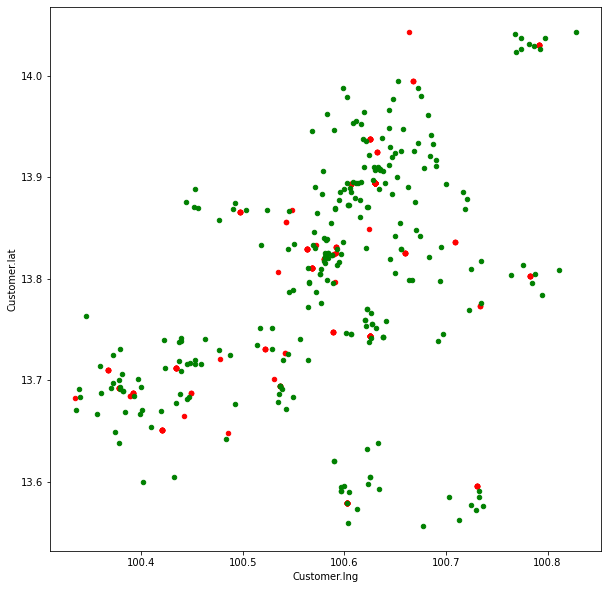

In [106]:
ax = X.plot(kind='scatter', x="Merchant.Lng", y="Merchant.Lat", color='r')    
ax = X.plot(kind='scatter', x="Customer.lng", y="Customer.lat", color='g', ax=ax)
ax.axes.set_aspect('equal')
ax.figure.set_size_inches(10,10)